First few rows of the data:
  Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent Agent

100%|██████████| 31/31 [00:31<00:00,  1.03s/it]

[LightGBM] [Info] Number of positive: 638, number of negative: 10156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 520
[LightGBM] [Info] Number of data points in the train set: 10794, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059107 -> initscore=-2.767482
[LightGBM] [Info] Start training from score -2.767482

Model performance comparison (LazyPredict):
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.65               0.66     0.66      0.74   
QuadraticDiscriminantAnalysis      0.85               0.65     0.65      0.87   
XGBClassifier                      0.95               0.65     0.65      0.9

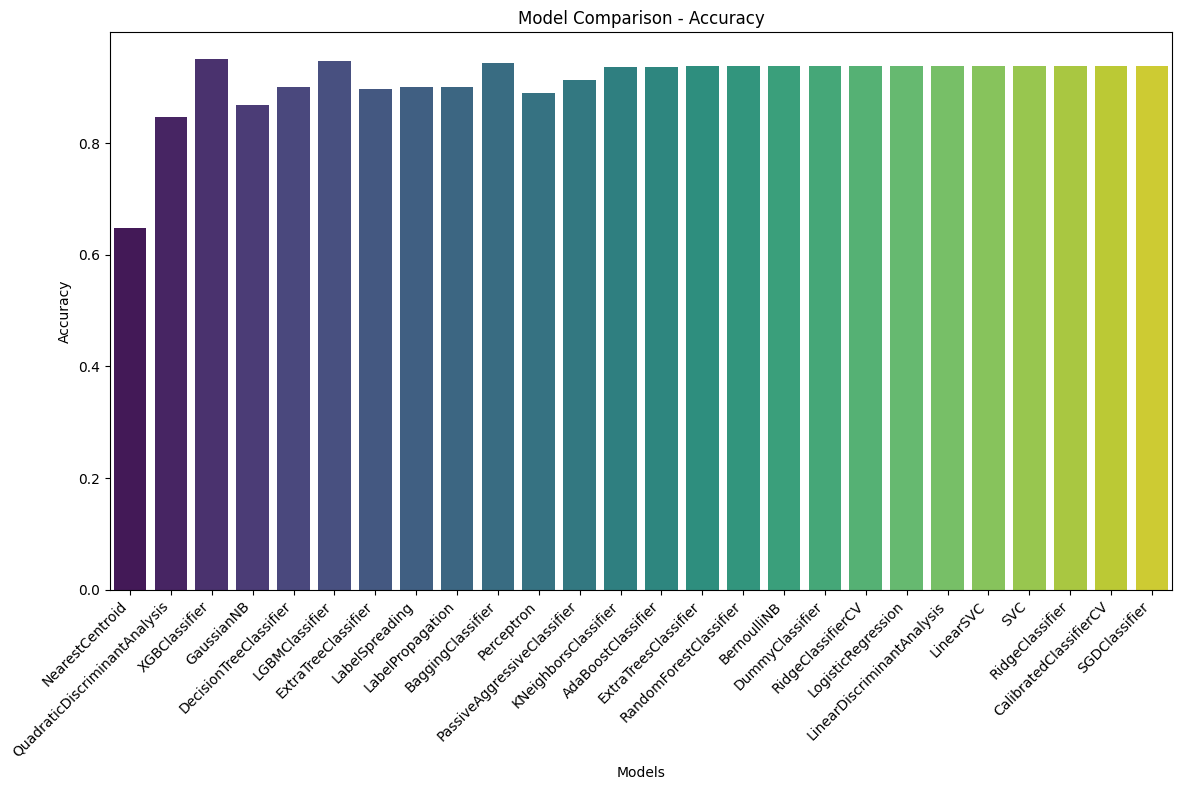

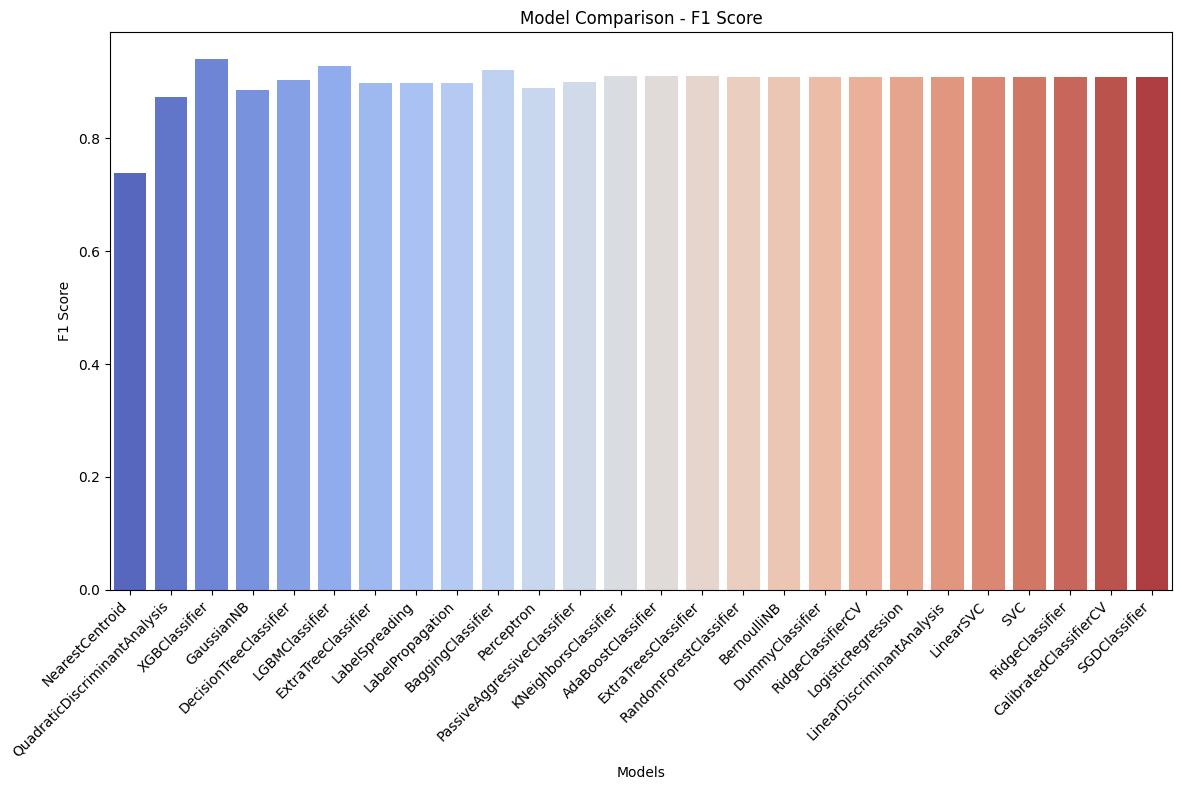

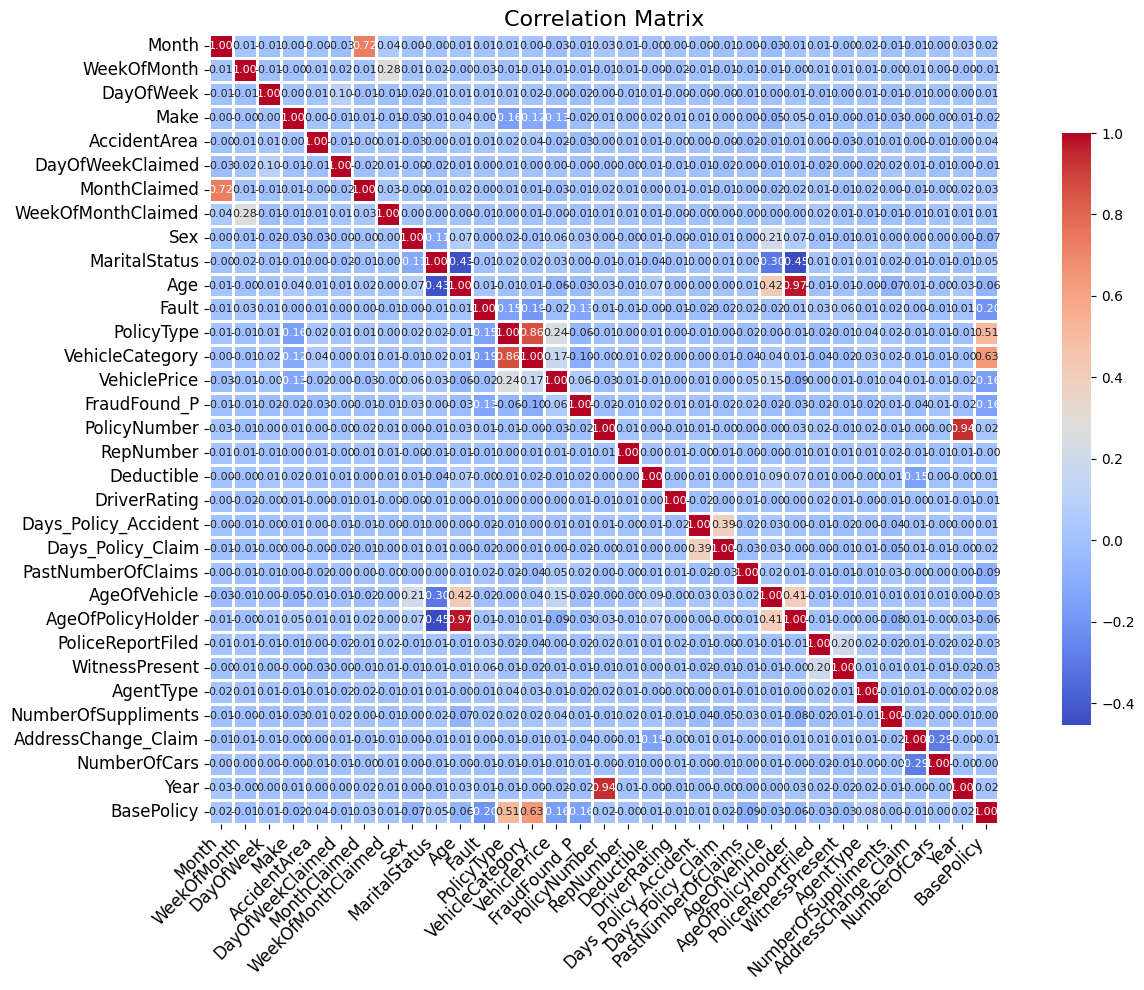


RandomForest Classifier Accuracy: 0.9386
RandomForest Classifier F1 Score: 0.0070

Confusion Matrix:
[[4341    0]
 [ 284    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       1.00      0.00      0.01       285

    accuracy                           0.94      4626
   macro avg       0.97      0.50      0.49      4626
weighted avg       0.94      0.94      0.91      4626


RandomForest Classifier ROC AUC: 0.8486

RandomForest Classifier Cross-Validation Scores: [0.45622568 0.93949416 0.94007782]
Mean CV Score: 0.7786
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters from GridSearchCV:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

Best RandomForest Classifier Accuracy after Hyperparameter Tuning: 0.9390
Best RandomForest Classifier F1 Score after Hyperparameter Tuning: 0.0276


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv(r'C:\Users\Niloufar\Desktop\fraud_detection\fraud_oracle.csv')  # Replace with the actual path to your dataset

# Data exploration and EDA (Exploratory Data Analysis)
print("First few rows of the data:")
print(df.head())
print("\nGeneral information about the data:")
print(df.info())
print("\nStatistical summary of the data:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Encoding categorical features using Label Encoding
data = df.copy()
label_encoder = LabelEncoder()

# Encode all object-type columns
for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

# Splitting the data into features and target variable
X = data.drop(columns=['FraudFound_P'])  # Replace 'FraudFound_P' with your target column
y = data['FraudFound_P']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use LazyClassifier to quickly evaluate models (with reduced models)
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

# Display LazyClassifier model performance comparison
print("\nModel performance comparison (LazyPredict):")
print(models)

# Plot model performance - Accuracy comparison (for a reduced set of models)
plt.figure(figsize=(12, 8))
sns.barplot(x=models.index, y=models['Accuracy'], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

# Plot model performance - F1 Score comparison (for a reduced set of models)
plt.figure(figsize=(12, 8))
sns.barplot(x=models.index, y=models['F1 Score'], palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

# Compute and plot the correlation matrix with improved readability
correlation_matrix = data.corr()

# Plot correlation matrix with better layout
plt.figure(figsize=(14, 10))  # Adjusted figure size to make the matrix less crowded but clearer
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, 
            cbar_kws={'shrink': 0.75}, annot_kws={"size": 8}, square=True)  # Reduced font size to 8 for better readability

# Rotate the axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Ensure everything fits nicely within the plot
plt.show()

# Train and evaluate RandomForestClassifier model
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use n_jobs=-1 to speed up training
rf_clf.fit(X_train, y_train)

# Predict using RandomForest
y_pred_rf = rf_clf.predict(X_test)

# Evaluate RandomForest model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"\nRandomForest Classifier Accuracy: {accuracy_rf:.4f}")
print(f"RandomForest Classifier F1 Score: {f1_rf:.4f}")

# Confusion Matrix for RandomForest model
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report for RandomForest model
class_report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(class_report)

# ROC AUC Score for RandomForest model
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"\nRandomForest Classifier ROC AUC: {roc_auc:.4f}")

# Cross-validation for RandomForest model
cv_scores = cross_val_score(rf_clf, X, y, cv=3)  # Reduced to 3-fold cross-validation for quicker results
print(f"\nRandomForest Classifier Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")

# Hyperparameter tuning using GridSearchCV for RandomForest model (limit the number of parameters)
param_grid = {
    'n_estimators': [50, 100],  # Reduce parameter range for faster results
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

# Retraining RandomForest with best hyperparameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

# Predict and evaluate with the best model
y_pred_best_rf = best_rf_clf.predict(X_test)
best_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
best_f1_rf = f1_score(y_test, y_pred_best_rf)

print(f"\nBest RandomForest Classifier Accuracy after Hyperparameter Tuning: {best_accuracy_rf:.4f}")
print(f"Best RandomForest Classifier F1 Score after Hyperparameter Tuning: {best_f1_rf:.4f}")
